# Data Augmentation
Credit to: https://neptune.ai/blog/data-augmentation-in-python
Ways to increase the dataset in image:
1. Geometric transformations – you can randomly flip, crop, rotate or translate images, and that is just the tip of the iceberg
2. Color space transformations – change RGB color channels, intensify any color
3. Kernel filters – sharpen or blur an image 
4. Random Erasing – delete a part of the initial image
5. Mixing images – basically, mix images with one another. Might be counterintuitive but it works

#### For these methods, Geometric transformations is the only one method that suit our objective.
This is because, Geometric transformations will not change or remove any information in the image.<br>
Because of our dataset is about Lung Cancer
1. Color space transformations - changed the important part RGB will cause the class different, maybe if the image class is Bengin, if the cancer cell RGB been change, so if the changed value lower than the threshold value, it will cause the area been removed.
2. Kernel filters - blur an image will reduce the pixel value and causee the pixel value lower than threshold value
3. Random Erasing - possibility to remove an important part or information of the image
4. Mixing image - increase the image information and cause the result not accurate

In [1]:
#mostly read file function
import numpy  
import pandas as pd
import glob
import numpy as np

from numpy import sqrt

from skimage.transform import pyramid_reduce, resize

#img function
import cv2 as cv
#thresholding filtering
import skimage.filters as filters

#ploting img or diagram function
import matplotlib.pyplot as plt

#train test split(split the dataset)
from sklearn.model_selection import train_test_split

#img preprocessing function
from sklearn.decomposition import PCA

#shuffle the list
from sklearn.utils import shuffle

#to get the optimal parameter for the model
from sklearn.model_selection import GridSearchCV

#models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#getting result tools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import seaborn as sns
import matplotlib

%matplotlib inline

from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation

#preprocessing part
from skimage.segmentation import clear_border
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import ball, disk, binary_erosion, remove_small_objects, reconstruction, binary_closing, binary_opening
from skimage.filters import roberts, sobel
from scipy import ndimage as ndi

#plot 3d
from skimage import measure, feature
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#get all classes names
classes = ["Bengin","Malignant","Normal"]

#get all images location(total 1097 img)
bengin_list = sorted(glob.glob('dataset/train/Bengin/*.*'))
malignant_list = sorted(glob.glob('dataset/train/Malignant/*.*'))
normal_list = sorted(glob.glob('dataset/train/Normal/*.*'))
print('Total Bengin Image: ', len(bengin_list))
print('Total Malignant Image: ', len(malignant_list))
print('Total Normal Image: ', len(normal_list))

#Define variable to hold X & y
#create numpy array placeholder for pixels with 1 channel(grayscale)
IMG_SIZE = 528
CHANNEL = 3
#arg: (length of numpy set, height, width, color channel)
bengin = np.empty((len(bengin_list), IMG_SIZE, IMG_SIZE, CHANNEL), dtype=np.uint8)
malignant = np.empty((len(malignant_list), IMG_SIZE, IMG_SIZE, CHANNEL), dtype=np.uint8)
normal = np.empty((len(normal_list), IMG_SIZE, IMG_SIZE, CHANNEL), dtype=np.uint8)

# convert images to numpy arrays
for i, img_path in enumerate(bengin_list):
    # load image
    img = cv.imread(img_path)
    img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
    bengin[i] = img

for i, img_path in enumerate(malignant_list):
    # load image
    img = cv.imread(img_path)
    img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
    malignant[i] = img

for i, img_path in enumerate(normal_list):
    # load image
    img = cv.imread(img_path)
    img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
    normal[i] = img

Total Bengin Image:  308
Total Malignant Image:  461
Total Normal Image:  316


In [3]:
#plot image with title
def plot_img(images, titles, camp='gray', rows = 3, cols = 4, fontsize=50, top=10, right=10):
    plt.subplots_adjust(top=top,right=right)
    for i in range(len(images)):
        #(rows, columns, index)
#         fig, ax = subplots(figsize=(18, 2))
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap=camp)
        plt.title(titles[i], fontsize=fontsize)
        plt.xticks([])
        plt.yticks([])
        
#define a function to plot the images
def image_show(image, title, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4,4))
    ax.imshow(image, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
    return fig, ax

In [4]:
bengin_flip_left_right = np.empty((len(bengin_list), IMG_SIZE, IMG_SIZE, CHANNEL), dtype=np.uint8)
for i, img in enumerate(bengin):
    bengin_flip_left_right[i] = tf.image.flip_left_right(img)

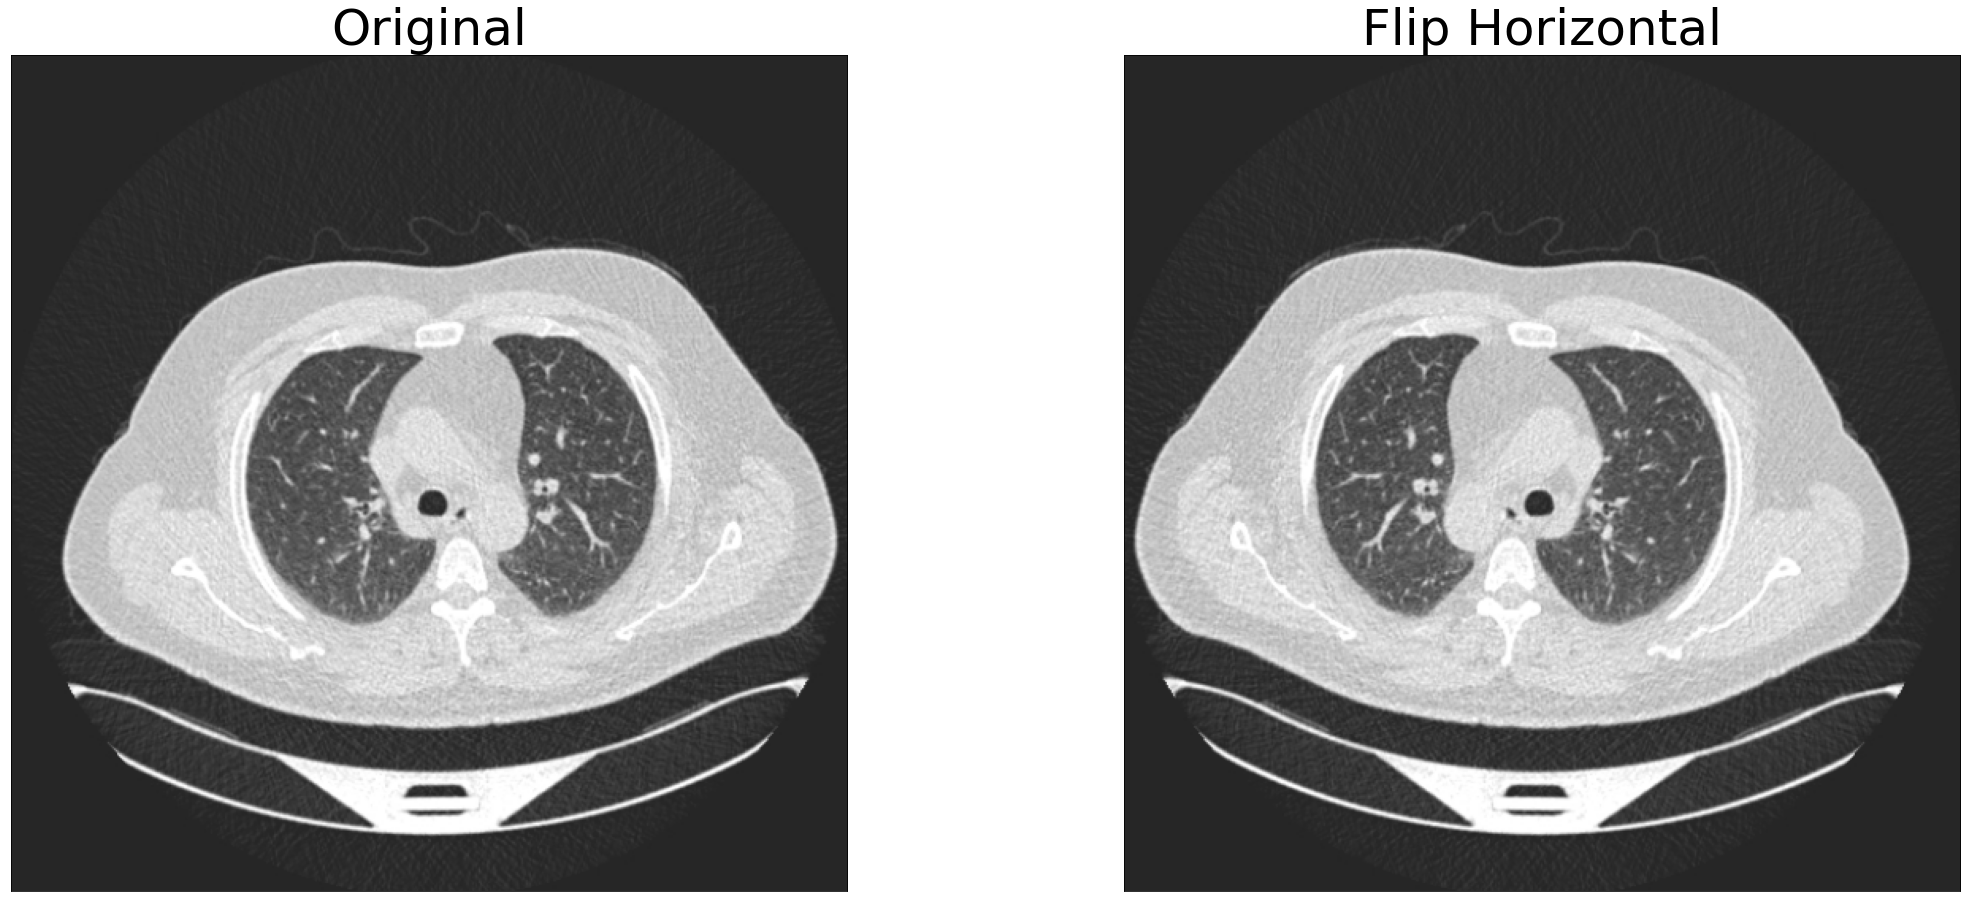

In [5]:
plot_img([bengin[0],bengin_flip_left_right[0]], ['Original','Flip Horizontal'])

In [17]:
#flip horizontally
directory1 = 'dataset/train/Bengin/Bengin case ('
directory2 = ').jpg'
num = 121
for img in bengin_flip_left_right:
    filename = directory1 + str(num) + directory2
    cv.imwrite(filename, img)
    num+=1

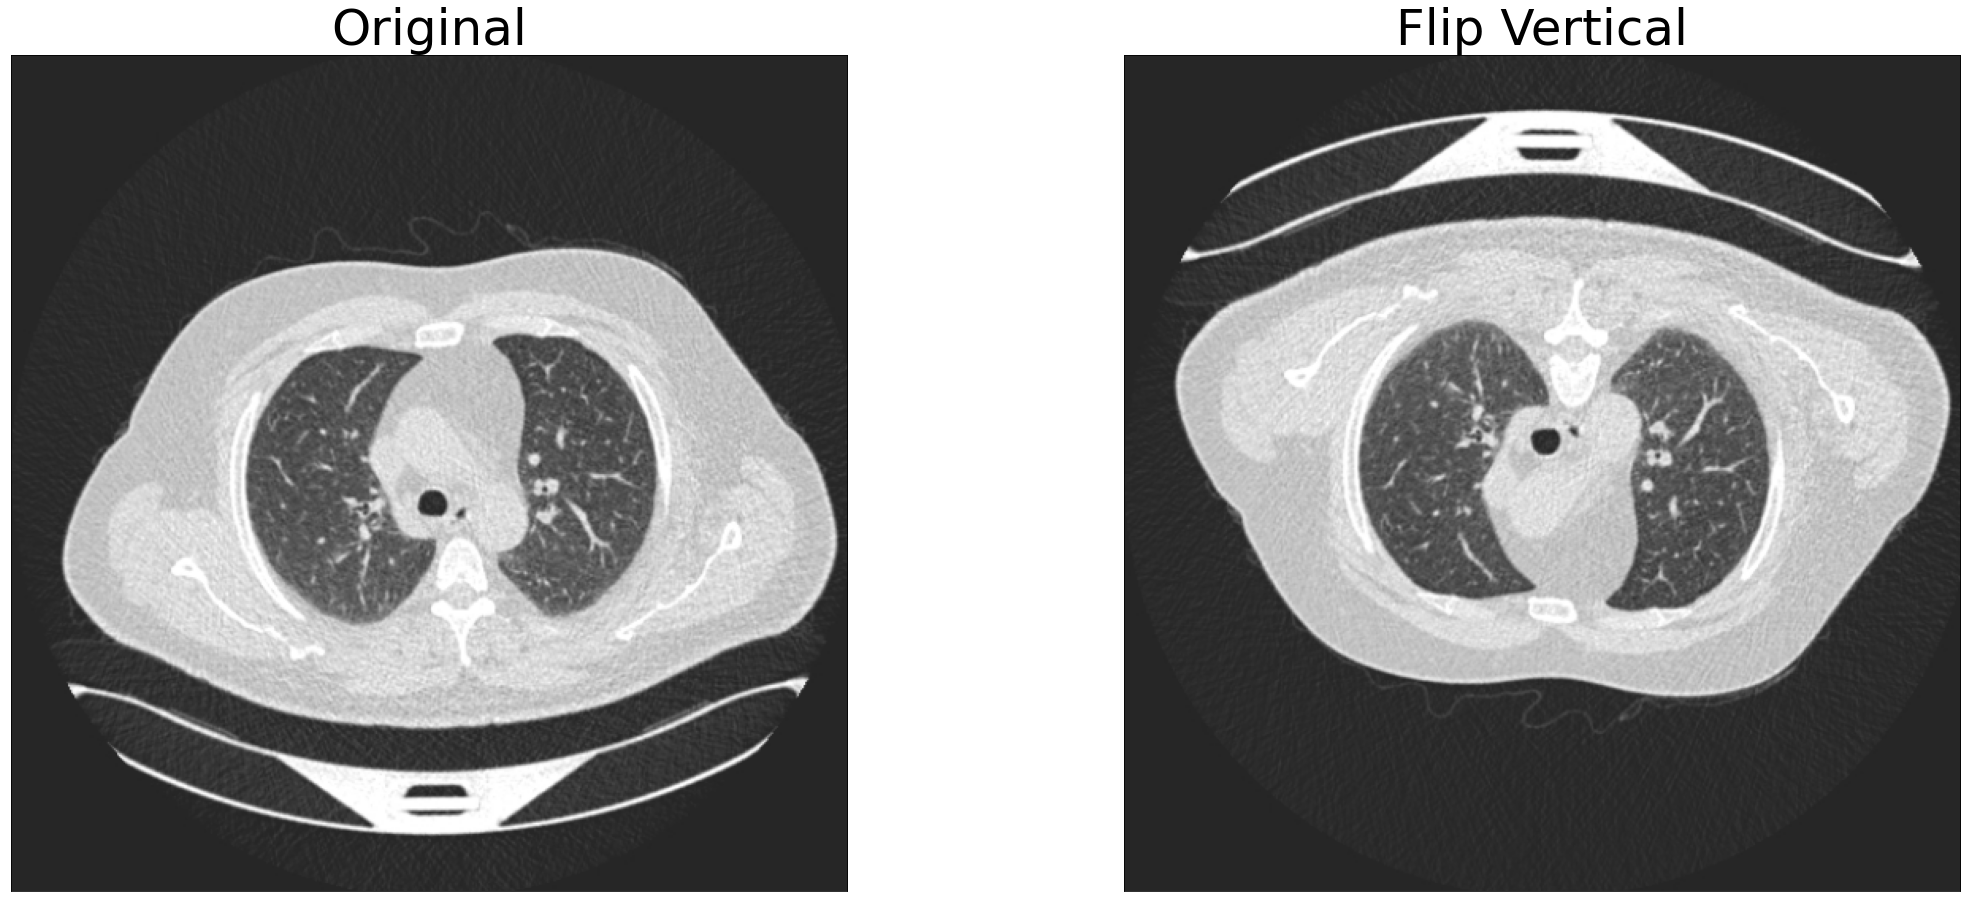

In [6]:
bengin_flip_up_down = np.empty((len(bengin_list), IMG_SIZE, IMG_SIZE, CHANNEL), dtype=np.uint8)
for i, img in enumerate(bengin):
    bengin_flip_up_down[i] = tf.image.flip_up_down(img)
plot_img([bengin[0],bengin_flip_up_down[0]], ['Original','Flip Vertical'])

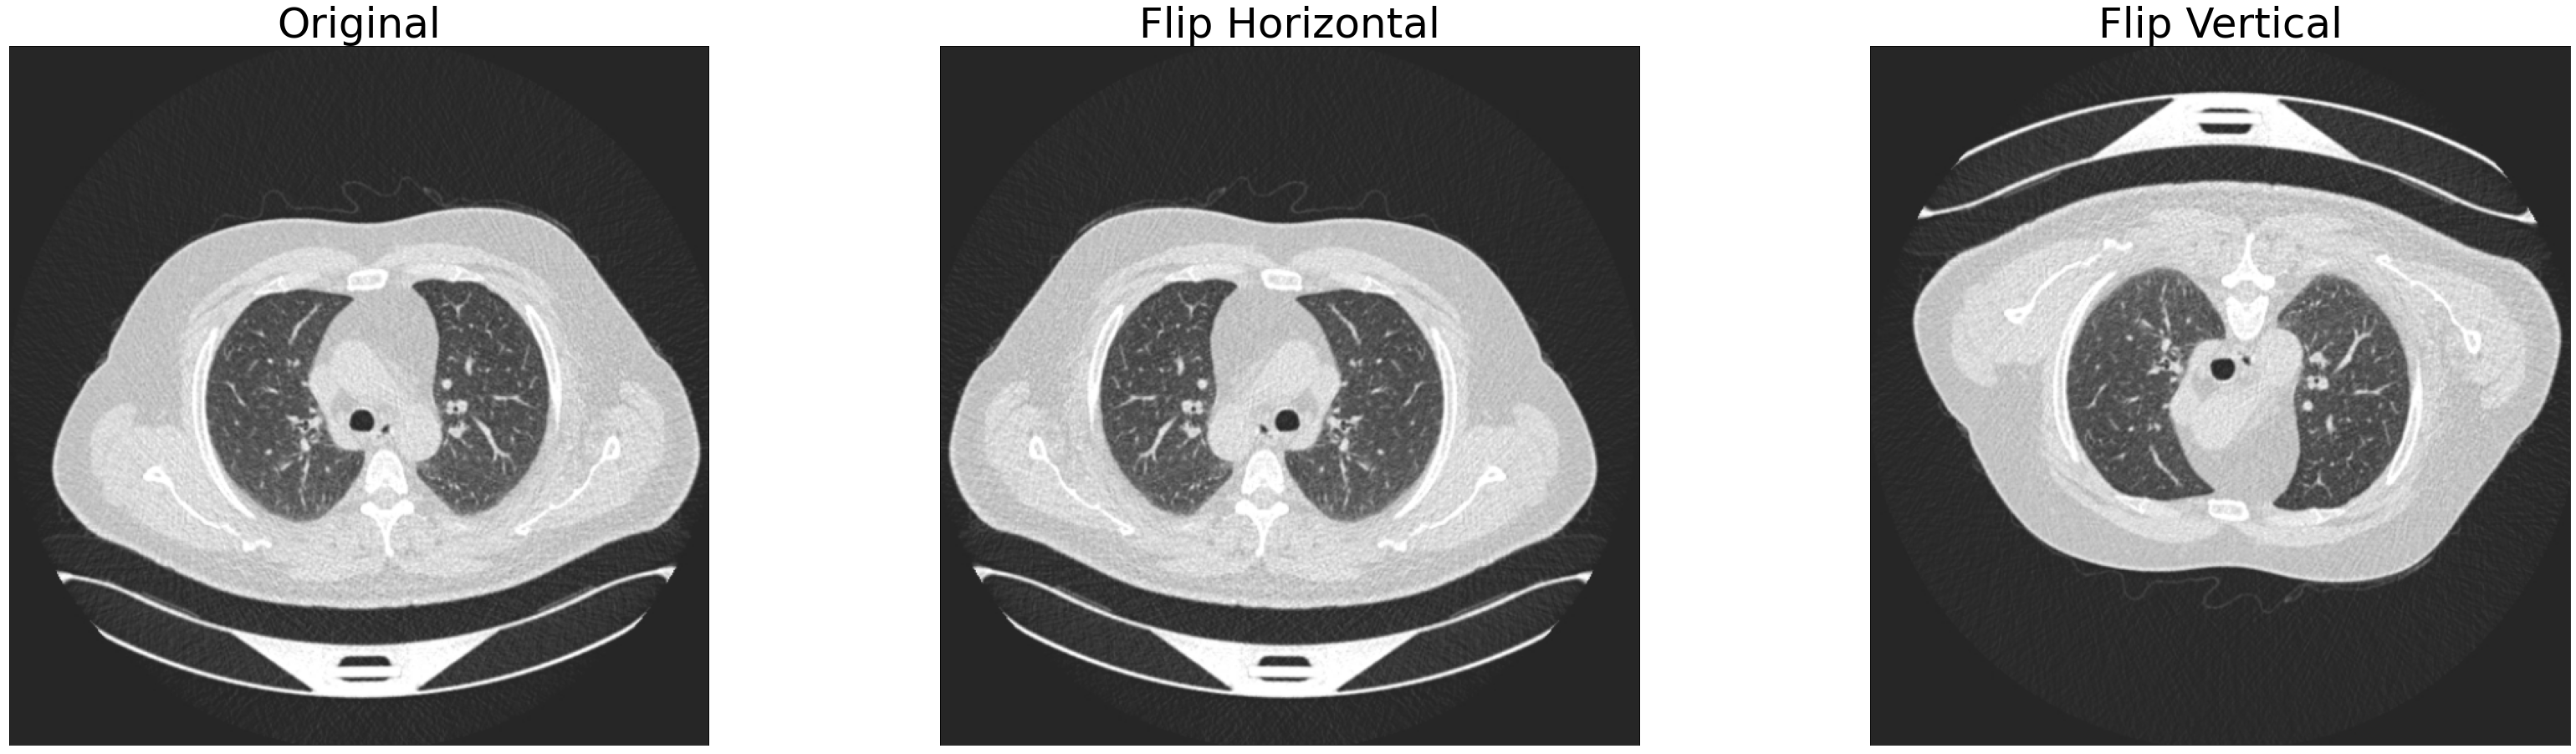

In [7]:
plot_img([bengin[0],bengin_flip_left_right[0],bengin_flip_up_down[0]], ['Original','Flip Horizontal','Flip Vertical'])

In [23]:
#flip vertically
directory1 = 'dataset/train/Bengin/Bengin case ('
directory2 = ').jpg'
num = 217
for img in bengin_flip_up_down:
    filename = directory1 + str(num) + directory2
    cv.imwrite(filename, img)
    num+=1